In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [199]:
dfx= pd.read_csv("Diabetes_XTrain.csv")
dfy= pd.read_csv("Diabetes_YTrain.csv")

In [200]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [201]:
dfx.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [202]:
type(dfx)

pandas.core.frame.DataFrame

In [203]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [204]:
dfx.shape

(576, 8)

In [205]:
dfy.shape

(576, 1)

In [206]:
X=dfx.values
Y=dfy.values

In [207]:
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [208]:
print(X.shape,Y.shape)

(576, 8) (576, 1)


In [209]:
Y=Y.reshape((-1,))     # so that y gives only value while slicing not a numpy array
Y.shape

(576,)

In [210]:
a=np.unique(Y,return_counts=True)


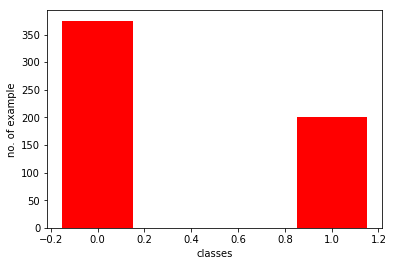

In [211]:
plt.bar(a[0],a[1],width=0.3,color="red")
plt.xlabel("classes")
plt.ylabel("no. of example")
plt.show()


In [212]:
dfx.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [213]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=X
Y_train=Y


dftest=pd.read_csv("Diabetes_XTest.csv")
X_test=dftest.values

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# knn algorithm

In [214]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,queryPoint,k=5):
    
    vals = []     ## to store distances
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)    ## it has 2 thing 1) unique class 2) freq of unique class
    #print(new_vals)
    
    index = new_vals[1].argmax()    ## gives the position of maximum number
    pred = new_vals[0][index]
    
    return pred

In [215]:
pred=[]
m=X_test.shape[0]

for i in range (m):
    p=knn(X_train,Y_train,X_test[i])
    pred.append(p)

In [216]:
pred=np.array(pred)
pred.shape

(192,)

In [217]:
dftest.shape

(192, 8)

In [218]:
pred=pd.DataFrame(pred)
pred.rename(columns={"0":"Outcome"},inplace=True)

In [219]:
pred.to_csv("ans.csv",index=False)

In [220]:
pred=pd.read_csv("ans.csv")

In [221]:
pred.shape

(192, 1)

In [222]:
pred=pred.values

In [223]:
pred.shape

(192, 1)